- We have run and execute this file in Google colab. That's why all libraries we imported in the same file and written code according to that.

In [1]:
# Importing libraries
import os
import io
import pandas as pd
import numpy as np
from google.colab import files
import warnings
warnings.filterwarnings("ignore")

# Visualization
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import seaborn as sns
import plotly.express as px
import re

# Performance Metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

from fbprophet import Prophet

In [2]:
# Upload data file to cloud
uploaded = files.upload()

Saving 14100355.csv to 14100355.csv


In [3]:
# Reading data file as pandas dataframe
df = pd.read_csv(io.BytesIO(uploaded['14100355.csv']))
print(df)

       REF_DATE               GEO  \
0       1976-01            Canada   
1       1976-01            Canada   
2       1976-01            Canada   
3       1976-01            Canada   
4       1976-01            Canada   
...         ...               ...   
592643  2022-05  British Columbia   
592644  2022-05  British Columbia   
592645  2022-05  British Columbia   
592646  2022-05  British Columbia   
592647  2022-05  British Columbia   

       North American Industry Classification System (NAICS)  \
0                          Total employed, all industries      
1                          Total employed, all industries      
2                          Total employed, all industries      
3                          Total employed, all industries      
4                          Total employed, all industries      
...                                                   ...      
592643                         Public administration [91]      
592644                         Public admin

In [4]:
df.isnull().sum()

REF_DATE                                                      0
GEO                                                           0
North American Industry Classification System (NAICS)         0
Statistics                                                    0
Data type                                                     0
VALUE                                                    190999
dtype: int64

In [5]:
df = df.dropna(how='any',axis=0)

In [6]:
# Assign date as an index
df.index = pd.to_datetime(df['REF_DATE'], format='%Y.%m.%d')
df

,REF_DATE,GEO,North American Industry Classification System (NAICS),Statistics,Data type,VALUE
REF_DATE,,,,,,
1976-01-01,1976-01,Canada,"Total employed, all industries",Estimate,Seasonally adjusted,9636.7
1976-01-01,1976-01,Canada,"Total employed, all industries",Estimate,Trend-cycle,9667.7
1976-01-01,1976-01,Canada,"Total employed, all industries",Estimate,Unadjusted,9271.4
1976-01-01,1976-01,Canada,Goods-producing sector,Estimate,Seasonally adjusted,3312.5
1976-01-01,1976-01,Canada,Goods-producing sector,Estimate,Trend-cycle,3328.0
...,...,...,...,...,...,...
2022-05-01,2022-05,British Columbia,Public administration [91],Estimate,Seasonally adjusted,135.4
2022-05-01,2022-05,British Columbia,Public administration [91],Estimate,Unadjusted,135.0
2022-05-01,2022-05,British Columbia,Public administration [91],Standard error of estimate,Seasonally adjusted,7.8


In [7]:
# Getting final data frame for model
temp = df.copy()
temp = temp[temp['North American Industry Classification System (NAICS)'] == 'Total employed, all industries'].reset_index(drop=True)
temp = temp[temp['GEO'] == 'Ontario'].reset_index(drop=True)
temp = temp[temp['Statistics'] == 'Estimate'].reset_index(drop=True)
temp = temp[temp['Data type'] == 'Seasonally adjusted'].reset_index(drop=True)
Date = pd.to_datetime(temp['REF_DATE'],format='%Y/%m/%d')
temp = temp.drop(['REF_DATE', 'GEO','North American Industry Classification System (NAICS)','REF_DATE','Statistics','Data type'], axis=1)

result = pd.concat([temp], axis=1)
total_employ = result.set_index(Date)
total_employ

,VALUE
REF_DATE,
1976-01-01,3707.4
1976-02-01,3713.4
1976-03-01,3728.4
1976-04-01,3735.7
1976-05-01,3734.2
...,...
2022-01-01,7493.5
2022-02-01,7687.8
2022-03-01,7722.9


In [8]:
# Fb prophet model
model = Prophet()

In [9]:
total_employ.reset_index(inplace=True)

In [10]:
total_employ.rename(columns={'REF_DATE':'ds', 'VALUE':'y'}, inplace=True)

In [11]:
# Fit model 
model.fit(total_employ)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
# Dataframe for future value
future = model.make_future_dataframe(freq='MS',periods=120)

In [13]:
future.tail()

,ds
672,2032-01-01
673,2032-02-01
674,2032-03-01
675,2032-04-01
676,2032-05-01


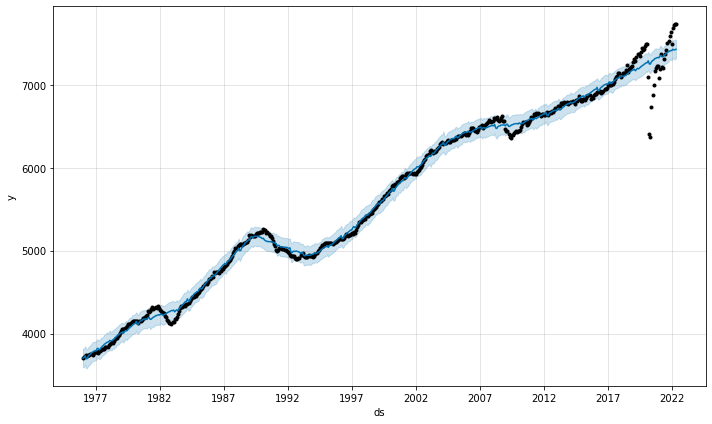

In [14]:
# Ploting prediction
predictions1=model.predict(total_employ)
model.plot(predictions1)
plt.show()

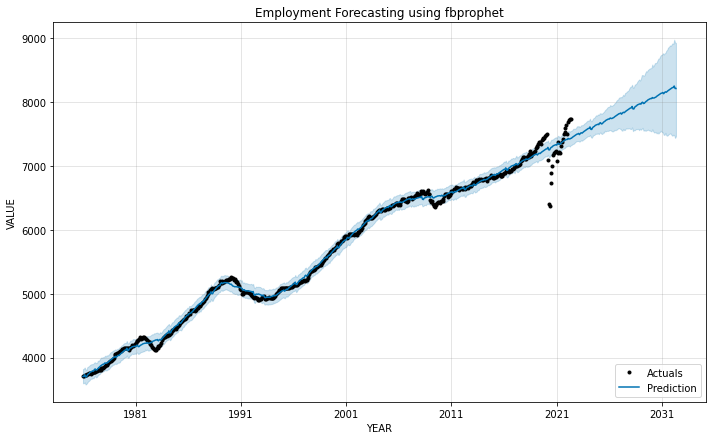

RMSE = 88.83951000746187


In [15]:
# Ploting graph for future
predictions=model.predict(future)
model.plot(predictions)
plt.title("Employment Forecasting using fbprophet")
plt.xlabel("YEAR")
plt.ylabel("VALUE")
plt.legend(["Actuals","Prediction"],loc ="lower right")
plt.show()
rms = mean_squared_error(total_employ['y'],predictions1['trend'], squared=True)
rmse = sqrt(rms)
print("RMSE =",rmse)


In [16]:
prediction = predictions.iloc[-365:]['yhat']

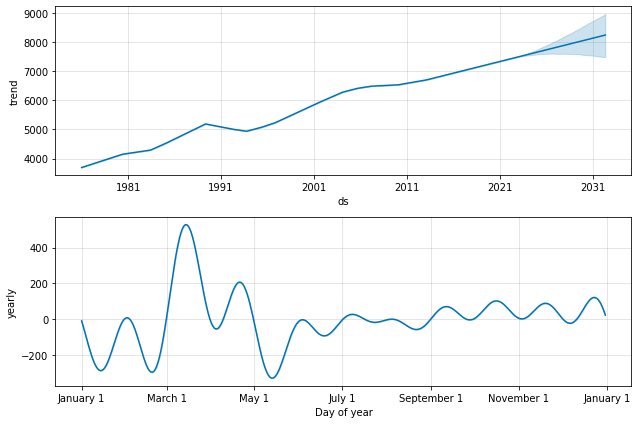

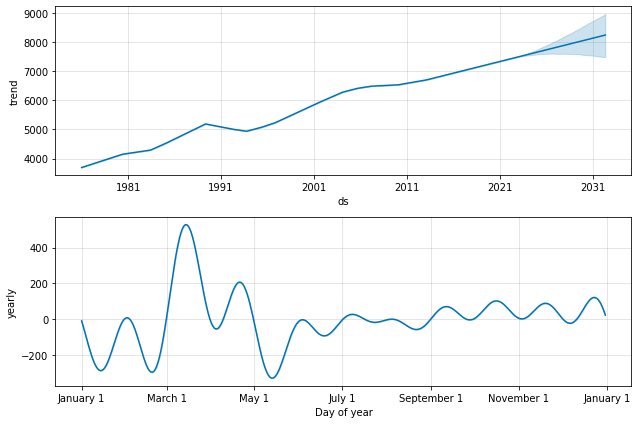

In [17]:
# Ploting components of the model
model.plot_components(predictions)
